In [1]:
import sqlite3

def query(query_str):
    conn = sqlite3.connect("MetaData.db")

    cursor = conn.execute(query_str)

    results = {
        "results": [
            dict(zip([column[0] for column in cursor.description], row))
            for row in cursor.fetchall()
        ]
    }

    conn.close()

    return results

files = query("SELECT * from frames WHERE filename like 'TSX%' or filename like 'TDX%'")

print(files)

print(len(files["results"]))

{'results': [{'id': 194, 'filename': 'TSX1_SAR__SSC______SM_S_SRA_20100621T184736_20100621T184744.xml', 'begintime': '2010-06-21T18:47:36', 'endtime': '2010-06-21T18:47:44', 'track': 41.0, 'frame': 6345.0, 'sensor': 'TSX1', 'orbit': 'na', 'datalevel': 'na', 'fileloc': '/home/data/TSX/South/T41_s011_6345_Katla/20100621/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20100621T184736_20100621T184744/TSX1_SAR__SSC______SM_S_SRA_20100621T184736_20100621T184744.xml'}, {'id': 195, 'filename': 'TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744.xml', 'begintime': '2010-07-02T18:47:36', 'endtime': '2010-07-02T18:47:44', 'track': 41.0, 'frame': 6345.0, 'sensor': 'TSX1', 'orbit': 'na', 'datalevel': 'na', 'fileloc': '/home/data/TSX/South/T41_s011_6345_Katla/20100702/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744.xml'}, {'id': 196, 'filename': 'TSX1_SAR__SSC______SM_S_SRA_20110723T074027_20110723T074035.xml', 

In [2]:


for result in files["results"]:
    print(result["fileloc"])

/home/data/TSX/South/T41_s011_6345_Katla/20100621/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20100621T184736_20100621T184744/TSX1_SAR__SSC______SM_S_SRA_20100621T184736_20100621T184744.xml
/home/data/TSX/South/T41_s011_6345_Katla/20100702/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744.xml
/home/data/TSX/South/T41_s011_6345_Katla/20110723/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20110723T074027_20110723T074035/TSX1_SAR__SSC______SM_S_SRA_20110723T074027_20110723T074035.xml
/home/data/TSX/South/T41_s011_6345_Katla/20110802/TSX-1.SAR.L1B/TDX1_SAR__SSC______SM_S_SRA_20110802T184744_20110802T184751/TDX1_SAR__SSC______SM_S_SRA_20110802T184744_20110802T184751.xml
/home/data/TSX/South/T41_s011_6345_Katla/20110813/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20110813T184745_20110813T184752/TSX1_SAR__SSC______SM_S_SRA_20110813T184745_20110813T184752.xml
/home/data/TSX/South/T41_s011_6345_Katla/20110824/TSX-1.SAR.

In [119]:
from glob import glob
import os
import numpy as np

import xml.etree.ElementTree as ET

Katla_folders = glob("/home/data/TSX/South/*_Katla")

print(Katla_folders)

ascending_filenames = []
descending_filenames = []


for Katla_folder in Katla_folders:
    xml_files = glob(Katla_folder+"/**/*.xml", recursive=True)
    
    print(Katla_folder)
    
    if Katla_folder == "/home/data/TSX/South/T41_s011_6345_Katla":
        for xml_file in xml_files:
            if os.path.basename(xml_file).startswith(("TSX", "TDX")):
                print(xml_file)
                ascending_filenames.append(xml_file)
                
    # if Katla_folder == "/home/data/TSX/South/T125_s009_f6345_Katla":
    #     for xml_file in xml_files:
    #         if os.path.basename(xml_file).startswith(("TSX", "TDX")):
    #             print(xml_file)
    #             descending_filenames.append(xml_file)
        
    
    with open(xml_files[0]) as file:
        xml_file = file.read()

        tree = ET.fromstring(xml_file)
        all_name_elements = tree.findall('.//orbitDirection')
        
        print(all_name_elements[0].text)
        
print(len(descending_filenames))

np.savetxt("ascending_filenames.dat", ascending_filenames, fmt="%s")


['/home/data/TSX/South/T125_s009_f6345_Katla', '/home/data/TSX/South/T132_s007_f6345_Katla', '/home/data/TSX/South/T41_s011_6345_Katla', '/home/data/TSX/South/T49_s013_f6345_Katla', '/home/data/TSX/South/T56_s003_f6345_Katla']
/home/data/TSX/South/T125_s009_f6345_Katla
DESCENDING
/home/data/TSX/South/T132_s007_f6345_Katla
ASCENDING
/home/data/TSX/South/T41_s011_6345_Katla
/home/data/TSX/South/T41_s011_6345_Katla/20100621/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20100621T184736_20100621T184744/TSX1_SAR__SSC______SM_S_SRA_20100621T184736_20100621T184744.xml
/home/data/TSX/South/T41_s011_6345_Katla/20100702/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744.xml
/home/data/TSX/South/T41_s011_6345_Katla/20110723/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20110723T074027_20110723T074035/TSX1_SAR__SSC______SM_S_SRA_20110723T074027_20110723T074035.xml
/home/data/TSX/South/T41_s011_6345_Katla/20110802/TSX-1.SAR.L

[datetime.datetime(2010, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2013, 1, 1, 0, 0), datetime.datetime(2014, 1, 1, 0, 0), datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2017, 1, 1, 0, 0), datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2019, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2021, 1, 1, 0, 0), datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2023, 1, 1, 0, 0), datetime.datetime(2024, 1, 1, 0, 0)]
BasePr, /home/data/TSX/South/T41_s011_6345_Katla/20100702/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744/TSX1_SAR__SSC______SM_S_SRA_20100702T184736_20100702T184744.xml, /home/data/TSX/South/T41_s011_6345_Katla/20111018/TSX-1.SAR.L1B/TSX1_SAR__SSC______SM_S_SRA_20111018T184746_20111018T184753/TSX1_SAR__SSC______SM_S_SRA_20111018T184746_20111018T184753.xml
BasePr, /home/data/TSX/South/T41_s011_6345_Katla/20111018/T

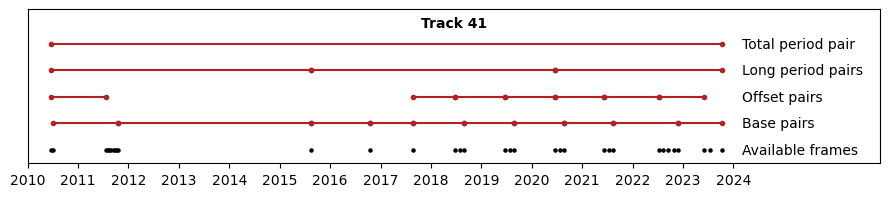

In [113]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import matplotlib.dates as mdates
from matplotlib import ticker
from datetime import datetime, timedelta
from matplotlib.colors import to_rgba
from pygeotools.lib import iolib, malib, geolib, warplib, timelib
import numpy as np



import datetime as datetime
# plt.rc('font', family='Helvetica')


xlim = [datetime.datetime(year=2010, month=1, day=1), datetime.datetime(year=2026, month=12, day=1)]
xticks = [datetime.datetime(year=year, month=1, day=1) for year in np.arange(2010, 2025)]

print(xticks)


orig_frames = np.loadtxt("frames_orig.txt", dtype=str)

fig = figure(figsize=(11,2))

base_pairs_asc = [(1, 9), 
                  (9, 10),
                  (10, 11),
                  (11, 12),
                  (12, 15),
                  (15, 18),
                  (18, 21),
                  (21, 24),
                  (24, 29),
                  (29, 32)
                  ]

offs_pairs_asc = [(0, 2), 
                  (12, 13),
                  (13, 16),
                  (16, 19),
                  (19, 22),
                  (22, 25),
                  (25, 30)
                  ]

lper_pairs_asc = [(0, 10), 
                  (10, 19),
                  (19, 32)
                  ]

tot_pairs_asc = [(0, -1), 
                  ]

fr = fig.add_subplot(1,1,1)


fr.text(datetime.datetime(year=2024, month=3, day=1), 1, "Available frames",
         ha="left", va="center")
for asc_fr in ascending_filenames:
    t1, t2 = timelib.fn_getdatetime_list(os.path.basename(asc_fr))
    
    fr.scatter(t1, 1, marker="o", color="black", s=5)
    
fr.text(datetime.datetime(year=2024, month=3, day=1), 2, "Base pairs",
         ha="left", va="center")
for pair in base_pairs_asc:
    t1 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[0]]))[0]
    t2 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[1]]))[0]
    
    print("BasePr, "+ascending_filenames[pair[0]]+", "+ascending_filenames[pair[1]])
    
    fr.plot([t1, t2], [2,2], marker="o", color="firebrick", ms=3)
    
fr.text(datetime.datetime(year=2024, month=3, day=1), 3, "Offset pairs",
        ha="left", va="center")
for pair in offs_pairs_asc:
    t1 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[0]]))[0]
    t2 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[1]]))[0]
    
    print("Offset, "+ascending_filenames[pair[0]]+", "+ascending_filenames[pair[1]])
    
    fr.plot([t1, t2], [3,3], marker="o", color="firebrick", ms=3)
    
fr.text(datetime.datetime(year=2024, month=3, day=1), 4, "Long period pairs",
        ha="left", va="center")
for pair in lper_pairs_asc:
    t1 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[0]]))[0]
    t2 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[1]]))[0]
    
    print("LonPer, "+ascending_filenames[pair[0]]+", "+ascending_filenames[pair[1]])
    
    fr.plot([t1, t2], [4,4], marker="o", color="firebrick", ms=3)
    
fr.text(datetime.datetime(year=2024, month=3, day=1), 5, "Total period pair",
        ha="left", va="center")
for pair in tot_pairs_asc:
    t1 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[0]]))[0]
    t2 = timelib.fn_getdatetime_list(os.path.basename(ascending_filenames[pair[1]]))[0]
    
    print("TotPer, "+ascending_filenames[pair[0]]+", "+ascending_filenames[pair[1]])
    
    fr.plot([t1, t2], [5,5], marker="o", color="firebrick", ms=3)
    
# for frame in orig_frames:
#     t1, t2 = timelib.fn_getdatetime_list(os.path.basename(frame))
    
#     fr.scatter(t1, 2, marker="o", color="red")
    
fr.set_yticks([])
fr.set_xticks([])
fr.tick_params(bottom=True, top=False, left=False, right=False)
fr.tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=False)

fr.set_ylim([0.5, 6.3])

fr.xaxis.set_major_locator(mdates.YearLocator())
fr.xaxis.set_major_formatter(mdates.ConciseDateFormatter(fr.xaxis.get_major_locator()))

fr.set_xlim(xlim)
fr.set_xticks(xticks)

bbox = fr.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
plt.text(00.5, 1-0.07/height, "Track 41", fontweight="bold",
     horizontalalignment='center',
     verticalalignment='top',
     transform = fr.transAxes)


# fr2 = fig.add_subplot(2,1,2)


# base_pairs_desc = [(0, 1), 
#                   (1, 2),
#                   (2, 3),
#                   (3, 9),
#                   (9, 12),
#                   (12, 15),
#                   (15, 17),
#                   (17, 20),
#                   (20, 23),
#                   (23, 25),
#                   (25, -1)
#                   ]

# offs_pairs_desc = [(4, 10),
#                   (10, 13),
#                   (13, 16),
#                   (16, 20),
#                   (20, 23),
#                   (23, 25),
#                   (25, -1)
#                   ]

# lper_pairs_desc = [(0, 7), 
#                   (7, 18),
#                   ]

# tot_pairs_desc = [(0, -1), 
#                   ]


# fr2.text(datetime.datetime(year=2024, month=3, day=1), 1, "Available frames",
#          ha="left", va="center")
# for desc_fr in descending_filenames:
#     t1, t2 = timelib.fn_getdatetime_list(os.path.basename(desc_fr))
    
#     fr2.scatter(t1, 1, marker="o", color="black", s=5)
    
# fr2.text(datetime.datetime(year=2024, month=3, day=1), 2, "Base pairs",
#          ha="left", va="center")
# for pair in base_pairs_desc:
#     t1 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[0]]))[0]
#     t2 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[1]]))[0]
    
#     fr2.plot([t1, t2], [2,2], marker="o", color="firebrick", ms=3)
    
# fr2.text(datetime.datetime(year=2024, month=3, day=1), 3, "Offset pairs",
#         ha="left", va="center")
# for pair in offs_pairs_desc:
#     t1 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[0]]))[0]
#     t2 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[1]]))[0]
    
#     fr2.plot([t1, t2], [3,3], marker="o", color="firebrick", ms=3)
    
# fr2.text(datetime.datetime(year=2024, month=3, day=1), 4, "Long period pairs",
#         ha="left", va="center")
# for pair in lper_pairs_desc:
#     t1 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[0]]))[0]
#     t2 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[1]]))[0]
    
#     fr2.plot([t1, t2], [4,4], marker="o", color="firebrick", ms=3)
    
# fr2.text(datetime.datetime(year=2024, month=3, day=1), 5, "Total period pair",
#         ha="left", va="center")
# for pair in tot_pairs_desc:
#     t1 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[0]]))[0]
#     t2 = timelib.fn_getdatetime_list(os.path.basename(descending_filenames[pair[1]]))[0]
    
#     fr2.plot([t1, t2], [5,5], marker="o", color="firebrick", ms=3)
    
# fr2.set_yticks([])
# fr2.set_ylim([0.5, 6.3])

# fr2.xaxis.set_major_locator(mdates.YearLocator())
# fr2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(fr.xaxis.get_major_locator()))

# fr2.set_xlim(xlim)
# fr2.set_xticks(xticks)

# bbox = fr2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# width, height = bbox.width, bbox.height
# plt.text(0.5, 1-0.07/height, "Track 49, descending", fontweight="bold",
#      horizontalalignment='center',
#      verticalalignment='top',
#      transform = fr2.transAxes)

# fig.subplots_adjust(hspace=0)

# fig.savefig("TKJS2GPSandSeisCoveragePlot.png", dpi=300, bbox_inches='tight')

plt.show()